# Task 1 — Data Analysis and Baseline Model

In the first part of the exercise, you are asked to explore, clean, and model a real dataset of apartment rentals.  
We will work step by step to prepare the data for regression.

---
## Load and Inspect the Dataset

We'll load the dataset using **pandas** and inspect its structure and key statistics.

> References:  
> - [10 Minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)  
> - [Pandas Cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html)


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/train.csv")
print("✅ Loaded dataset:", df.shape)

# Show structure
display(df.head())
display(df.info())
display(df.describe())
display(df['baseRent'].describe())


✅ Loaded dataset: (346, 50)


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,americanArea
0,Nordrhein_Westfalen,235.0,central_heating,NaN,NaN,False,True,8,5.13,NaN,...,Handorf,Ruhig und hell! Wohnen auf 100 m²: 2-Raum-Wohn...,NaN,NaN,F,NaN,NaN,NaN,May19,1076.390000
1,Nordrhein_Westfalen,180.0,heat_pump,NaN,NaN,True,True,18,4.98,NaN,...,Wolbeck,Die angebotene Wohnung im 1. Obergeschoss ist ...,Bei diesem Mehrfamilienhaus / dieser Wohnung f...,80.0,A_PLUS,NaN,NaN,NaN,Oct19,942.487084
2,Nordrhein_Westfalen,140.0,gas_heating,ONE_YEAR_FREE,NaN,False,True,6,6.67,40.0,...,Kinderhaus_West,Die 3 Zimmer Wohnung befindet sich in der erst...,Die Wohnung ist mit neuem Laminat ausgestattet...,90.0,NaN,NaN,90.76,0.1915,Sep18,826.129325
3,Nordrhein_Westfalen,180.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,1,6.93,10.0,...,Pluggendorf,Dieses mit langer und wechselhafter Geschichte...,Das immer wieder liebevoll sanierte Haus (im z...,NaN,NaN,2013.0,90.76,0.1915,Sep18,828.820300
4,Nordrhein_Westfalen,170.0,NaN,ONE_YEAR_FREE,NaN,True,True,19,6.81,40.0,...,Gremmendorf_West,Sie sind interessiert an ruhigem Wohnen mit Ba...,• verfügbar ab dem 01.12.2018 • Küche kann übe...,NaN,NaN,NaN,90.76,0.1915,Sep18,914.931500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   regio1                    346 non-null    object 
 1   serviceCharge             326 non-null    float64
 2   heatingType               271 non-null    object 
 3   telekomTvOffer            294 non-null    object 
 4   telekomHybridUploadSpeed  27 non-null     float64
 5   newlyConst                346 non-null    bool   
 6   balcony                   346 non-null    bool   
 7   picturecount              346 non-null    int64  
 8   pricetrend                345 non-null    float64
 9   telekomUploadSpeed        294 non-null    float64
 10  totalRent                 213 non-null    float64
 11  yearConstructed           277 non-null    float64
 12  scoutId                   346 non-null    int64  
 13  noParkSpaces              179 non-null    float64
 14  firingType

None

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice,americanArea
count,326.000000,27.0,346.000000,345.000000,294.000000,213.000000,277.000000,3.460000e+02,179.000000,277.000000,...,185.000000,263.000000,231.000000,346.000000,346.000000,78.000000,105.000000,50.00,5.000000e+01,346.000000
mean,178.986135,10.0,9.517341,5.176319,34.118367,1124.399437,1988.819495,1.086100e+08,1.184358,5.346570,...,101.594162,1.711027,3.060606,2.505780,3.358382,76.337051,2016.257143,90.76,1.915000e-01,917.414352
std,87.974859,0.0,6.768725,0.970192,12.653616,535.901432,30.653213,1.052478e+07,1.961592,2.943138,...,56.134963,1.553177,1.646012,1.072027,1.655523,38.555966,4.031197,0.00,2.803737e-17,1410.517094
min,0.000000,10.0,0.000000,1.390000,2.400000,195.000000,1849.000000,4.882973e+07,0.000000,1.000000,...,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1994.000000,90.76,1.915000e-01,0.000000
25%,120.000000,10.0,5.000000,4.610000,40.000000,716.000000,1973.000000,1.073641e+08,1.000000,3.000000,...,54.000000,1.000000,2.000000,2.000000,2.000000,51.250000,2015.000000,90.76,1.915000e-01,570.486700
50%,160.000000,10.0,8.000000,5.130000,40.000000,1005.000000,1995.000000,1.114180e+08,1.000000,5.000000,...,97.600000,1.000000,3.000000,2.000000,3.000000,79.995000,2017.000000,90.76,1.915000e-01,807.292500
75%,210.000000,10.0,12.000000,5.880000,40.000000,1440.000000,2017.000000,1.145041e+08,1.000000,9.000000,...,139.100000,2.000000,4.000000,3.000000,4.000000,95.000000,2019.000000,90.76,1.915000e-01,1075.851805
max,513.040000,10.0,41.000000,7.140000,40.000000,2970.000000,2020.000000,1.157098e+08,27.000000,9.000000,...,264.600000,14.000000,14.000000,5.000000,7.000000,200.000000,2020.000000,90.76,1.915000e-01,26048.638000


count     346.000000
mean      883.870636
std       452.058611
min         0.000000
25%       563.145000
50%       785.000000
75%      1100.000000
max      2835.000000
Name: baseRent, dtype: float64

---

## Identify and Handle Outliers

We'll check how outliers affect a simple linear regression model between `livingSpace` and `baseRent`. As a first step, we simply take all the data (which is available – panda offers nice functionality to clean this easily) and try to fit it in this notebook:


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Remove rows with missing values in livingSpace or totalRent
# This is 
df_clean = df.dropna(subset=["livingSpace", "baseRent"])

# Use only livingSpace and totalRent
X = df_clean[['livingSpace']].to_numpy()
y = df_clean['baseRent'].to_numpy()

# Model on all data
model_full = LinearRegression().fit(X, y)
r2_full = r2_score(y, model_full.predict(X))
print(len(y))
print(f"R^2 (all data): {r2_full:.3f}")


346
R^2 (all data): 0.031


In [54]:
df_clean = df.dropna(subset=["livingSpace", "totalRent"])
X = df_clean[['livingSpace']].to_numpy()
y = df_clean['totalRent'].to_numpy()
model_full = LinearRegression().fit(X,y)
r2_full = r2_score(y, model_full.predict(X))
print(f"R² score: {r2_full:.3f}")

R² score: 0.809


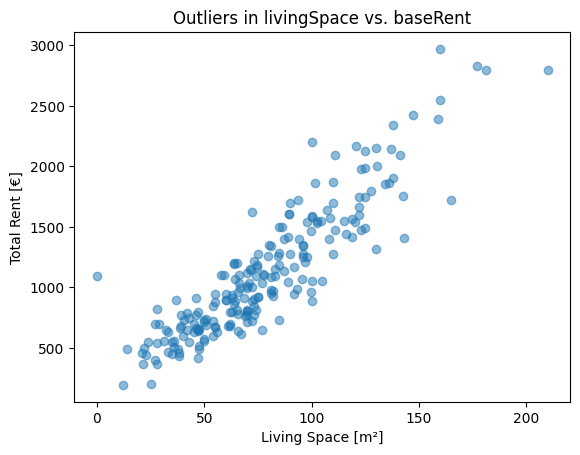

In [55]:
plt.scatter(X, y, alpha=0.5)
plt.xlabel("Living Space [m²]")
plt.ylabel("Total Rent [€]")
plt.title("Outliers in livingSpace vs. baseRent")
plt.show()

The resulting correlation is surprisingly low. When we take only a small part of the data, the correlation goes dramatically up:

In [56]:
# Model on first 100 samples only (to show difference)
model_sub = LinearRegression().fit(X[:100], y[:100])
r2_sub = r2_score(y[:100], model_sub.predict(X[:100]))
print(f"R^2 (first 100 samples): {r2_sub:.3f}")

R^2 (first 100 samples): 0.844


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

df_train = pd.read_csv("../data/train.csv")[:100]
df_val = pd.read_csv("../data/validation.csv")

# --- Clean feature selection and NaN removal ---
df_train = df_train[['livingSpace', 'baseRent']].dropna()
df_val = df_val[['livingSpace', 'baseRent']].dropna()

# Use only livingSpace and totalRent
X_train = df_train[['livingSpace']].to_numpy()
y_train = df_train['baseRent'].to_numpy()

# Use only livingSpace and totalRent
X_val = df_val[['livingSpace']].to_numpy()
y_val = df_val['baseRent'].to_numpy()

# Train model on the first 100 samples only
model_sub = LinearRegression().fit(X_train, y_train)

# Predict on both training subset and validation set
y_pred_train = model_sub.predict(X_train)
y_pred_val = model_sub.predict(X_val)

# Compute metrics
r2_train = r2_score(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)

r2_val = r2_score(y_val, y_pred_val)
rmse_val = root_mean_squared_error(y_val, y_pred_val)

# Print results
print("📊 Model performance (trained on first 100 samples)")
print(f"Training subset — R²: {r2_train:.3f}, RMSE: {rmse_train:.1f} €")
print(f"Validation set  — R²: {r2_val:.3f}, RMSE: {rmse_val:.1f} €")

📊 Model performance (trained on first 100 samples)
Training subset — R²: 0.806, RMSE: 187.6 €
Validation set  — R²: 0.788, RMSE: 208.5 €


This suggests that there is something wrong with the data. We should inspect the data, e.g., in a visual way using a scatter plot.

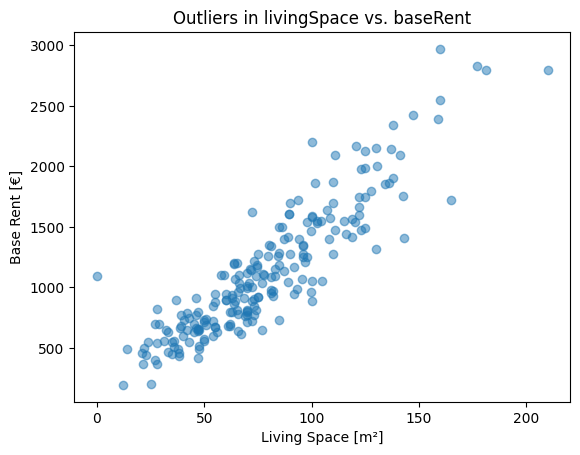

In [58]:
# Visualize data
plt.scatter(X, y, alpha=0.5)
plt.xlabel("Living Space [m²]")
plt.ylabel("Base Rent [€]")
plt.title("Outliers in livingSpace vs. baseRent")
plt.show()

Next step: Remove this outlier from the data – and try to fit the model again. 

Before cleaning: 346 entries
After removing small apartments (<10 m^2): 343 entries


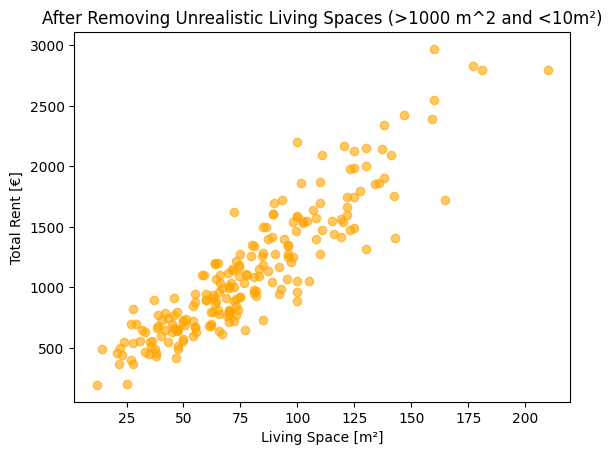

In [59]:
# Example: remove clearly unrealistic entries
# (e.g. apartments with living space larger than 1000 m^2)

print(f"Before cleaning: {len(df)} entries")

# Remove such rows
df_cleaned = df[(df["livingSpace"] < 1000) & (df["livingSpace"] > 10)]

print(f"After removing small apartments (<10 m^2): {len(df_cleaned)} entries")

# Optional: visualize the cleaned data again
plt.scatter(df_cleaned["livingSpace"], df_cleaned["totalRent"], alpha=0.6, color="orange")
plt.xlabel("Living Space [m²]")
plt.ylabel("Total Rent [€]")
plt.title("After Removing Unrealistic Living Spaces (>1000 m^2 and <10m²)")
plt.show()

### Dealing with Categorical Features

Some features in our dataset are *categorical* — such as `"condition"`.  As Machine Learning models require numeric input, we want to encode the categorical data into numbers.

For the exercise, you should implement this as a helper function inside  
`src/preprocessing.py`, in the function `encode_categorical_features(df)`.

Below as a simple example: we transform the column `"condition"`  
into a numeric version by taking the length of each string.

In [60]:
# Example: simple encoding for categorical features
# (this logic will later go into src/preprocessing.py)

# Create a simple numeric encoding (length of the string)
# Pandas iterates over the whole frame "autonmatically"
df["condition_num"] = df["condition"].apply(lambda x: len(str(x)))

# Show first few examples
print(df[["condition", "condition_num"]].head(10))

         condition  condition_num
0        well_kept              9
1   first_time_use             14
2  fully_renovated             15
3              NaN              3
4   mint_condition             14
5              NaN              3
6        well_kept              9
7        well_kept              9
8              NaN              3
9   mint_condition             14


As an alternative: Pandas offers quite some support for quickly going over full datasets (and in an efficient manner), but if you want to explicitly loop over the rows you can do this as well:

In [61]:

condition_num_values = []

for idx, row in df.iterrows():
    value = row["condition"]

    # Example conditional logic
    if isinstance(value, str):
        num_value = len(value)  # use string length as encoding
    else:
        num_value = 0  # fallback if not a string

    condition_num_values.append(num_value)

# Add the encoded column
df["condition_num"] = condition_num_values

# Show first few examples
print(df[["condition", "condition_num"]].head(10))

         condition  condition_num
0        well_kept              9
1   first_time_use             14
2  fully_renovated             15
3              NaN              0
4   mint_condition             14
5              NaN              0
6        well_kept              9
7        well_kept              9
8              NaN              0
9   mint_condition             14


In [62]:
df_encoded = df.copy()

condition_mapping = {
        "well_kept": 0,            
        "modernized": 1,         
        "fully_renovated": 2,     
        "first_time_use_after_refurbishment": 3,
        "refurbished": 4,
        "first_time_use": 5,       
        "mint_condition": 6       
    }

df_encoded["condition_num"] = df_encoded["condition"].map(condition_mapping)
df_encoded["condition_num"] = df_encoded["condition_num"].fillna(3)
print(df_encoded['condition_num'].value_counts(dropna=False))




condition_num
3.0    100
0.0     73
5.0     65
6.0     53
2.0     23
1.0     16
4.0     16
Name: count, dtype: int64


In [63]:
mean_prices = df_encoded.groupby("heatingType")["totalRent"].mean()
mean_prices_sorted = mean_prices.sort_values()
print(mean_prices_sorted)
heating_mapping = {kategorie: rang for rang, kategorie in enumerate(mean_prices_sorted.index)}
print(heating_mapping)
df_encoded['heatingType_num'] = df_encoded['heatingType'].map(heating_mapping)
median = int(len(heating_mapping)/2)
df_encoded['heatingType_num'] = df_encoded['heatingType_num'].fillna(median)

heatingType
electric_heating                   698.000000
central_heating                   1017.966835
gas_heating                       1060.736842
district_heating                  1128.618000
oil_heating                       1142.166667
heat_pump                         1190.000000
floor_heating                     1278.741935
self_contained_central_heating    1310.000000
wood_pellet_heating               1400.000000
combined_heat_and_power_plant     1851.666667
Name: totalRent, dtype: float64
{'electric_heating': 0, 'central_heating': 1, 'gas_heating': 2, 'district_heating': 3, 'oil_heating': 4, 'heat_pump': 5, 'floor_heating': 6, 'self_contained_central_heating': 7, 'wood_pellet_heating': 8, 'combined_heat_and_power_plant': 9}


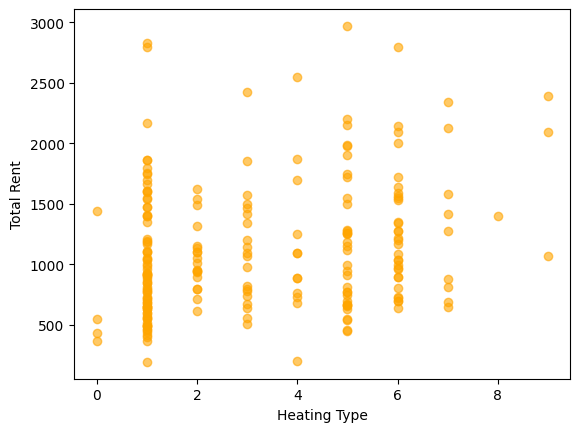

In [64]:
plt.scatter(df_encoded['heatingType_num'],df_encoded['totalRent'], alpha = 0.6, color ="orange")
plt.xlabel("Heating Type")
plt.ylabel("Total Rent")
plt.show()

In [47]:
print(df_encoded['heatingType'].value_counts(dropna= False))
heatingType_mapping = {
        "central_heating": 0,            
        "floor_heating": 1,         
        "gas_heating": 2,     
        "district_heating": 3,
        "self_contained_central_heating": 4,
        "oil_heating": 5,       
        "heat_pump": 6,
        "electricity_heating": 7,
        "combined_heat_and_power_plant": 8,
        "wood_pellet_heating": 9,
        "unknown": 10
    }
df_encoded["heatingType_num"] = df_encoded["condition"].map(condition_mapping)
df_encoded["heatingType_num"] = df_encoded["condition_num"].fillna(10)

heatingType
central_heating                   133
NaN                                75
floor_heating                      36
gas_heating                        29
district_heating                   23
self_contained_central_heating     17
oil_heating                        13
heat_pump                           8
electric_heating                    7
combined_heat_and_power_plant       4
wood_pellet_heating                 1
Name: count, dtype: int64


In [48]:
df_clean3 = df_encoded.dropna(subset=["condition_num", "totalRent"])


X3 = df_clean3[['condition_num']].to_numpy()
y3 = df_clean3['totalRent'].to_numpy()
model_full3 = LinearRegression().fit(X3,y3)
r2_full3 = r2_score(y3, model_full3.predict(X3))
print(f"R² score: {r2_full3:.3f}")
df_clean3.to_csv('../data/df_encoded3.csv')


R² score: 0.060


---
## Handle Missing Values

We'll detect missing data and demonstrate simple handling. As part of the exercise, you are supposed to implement more systematic cleaning and adding missing values in your preprocessing functions.


In [32]:
# Count missing values
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
display(missing_summary.head(10))

print("\n Example 'condition' values before filling:")
display(df["condition"].head(10))

# Example: fill missing 'condition' entries
df['condition'] = df['condition'].fillna('unknown')

print("\n Example 'condition' values after filling:")
display(df["condition"].head(10))

# Show how many 'unknown' entries were filled
num_unknown = (df["condition"] == "unknown").sum()
print(f"\n Replaced {num_unknown} missing entries with 'unknown'.")


Missing values per column:


telekomHybridUploadSpeed    319
electricityKwhPrice         296
electricityBasePrice        296
heatingCosts                268
lastRefurbish               241
energyEfficiencyClass       219
noParkSpaces                167
thermalChar                 161
petsAllowed                 153
streetPlain                 146
dtype: int64


 Example 'condition' values before filling:


0          well_kept
1     first_time_use
2    fully_renovated
3                NaN
4     mint_condition
5                NaN
6          well_kept
7          well_kept
8                NaN
9     mint_condition
Name: condition, dtype: object


 Example 'condition' values after filling:


0          well_kept
1     first_time_use
2    fully_renovated
3            unknown
4     mint_condition
5            unknown
6          well_kept
7          well_kept
8            unknown
9     mint_condition
Name: condition, dtype: object


 Replaced 84 missing entries with 'unknown'.


---
## Baseline Regression Model

As a last step: We want to apply this on a regression model. You should implement the helper functions in `src` (initially, this will run, but will lead again only to a very low r^2 correlation). And then we simply test this on a scikit-learn model.
You will later replace the scikit-learn implementation with your own version based on the Normal Equation.


In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import os, sys

# Detect current working directory and move up to project root if needed
project_root = os.path.abspath("..") 
if project_root not in sys.path:
    sys.path.append(project_root)

from src.preprocessing import clean_data
# These functions initially contain a scikit implementation.
from src.baseline_model import train_baseline_model, evaluate_model

# Clean the dataset
df_clean = clean_data(df)
# Convert to numpy

X_train = df_clean[['livingSpace']].to_numpy()
X_train_cat = df_clean['condition_num'].to_numpy().reshape(-1,1)
y_train = df_clean['totalRent'].to_numpy()

# Train model
model = train_baseline_model(X_train, y_train)
model_cat = train_baseline_model(X_train_cat,y_train)

# Evaluatehead
eval_result = evaluate_model(model, X_train, y_train)
eval_result_cat = evaluate_model(model_cat, X_train_cat, y_train)
print("Evaluation on training data set:", eval_result)
print("Evaluation on training data cat feature, r2:", eval_result_cat)


Dataframe before cleaning:  (346, 51)
Cleaning Data....
Only regarding livingSpace > 10 m² & < 1000m² Shape:  (343, 51)
Removing PLZ that are not based in Münster
Missing Values serviceCharge 19
Missing values serviceCharge after filling: 0
Removing columns with to many NaNs
Dataframe nach dem Cleanen:  (342, 30)
Evaluation on training data set: {'r2': 0.7847247430729117, 'rmse': 237.33174187515783}
Evaluation on training data cat feature, r2: {'r2': 0.10496079371150524, 'rmse': 483.92693845615844}


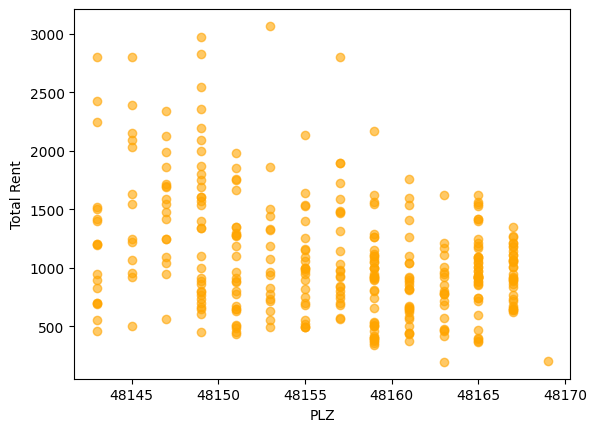

In [35]:
plt.scatter(df_clean['geo_plz'],df_clean['totalRent'], alpha = 0.6, color ="orange")
plt.xlabel("PLZ")
plt.ylabel("Total Rent")
plt.show()

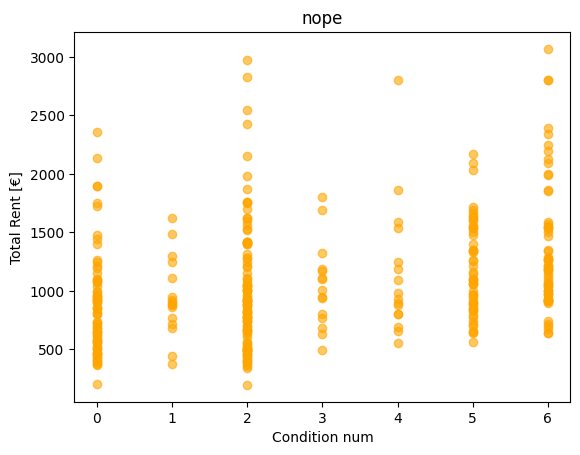

In [24]:
plt.scatter(df_clean["condition_num"], df_clean["totalRent"], alpha=0.6, color="orange")
plt.xlabel("Condition num")
plt.ylabel("Total Rent [€]")
plt.title("nope")
plt.show()

In [25]:
df_clean.to_csv('../data/cleaned_data.csv')

---
## Run Automated Tests

Finally, you can verify your implementation using the provided test suite (in the project there is a test folder and you can run pytest on this, or simply call this cell for testing the different parts here – this is an automatically translated call from that file).


In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
import os, sys

# Add src directory to path (for notebooks)
sys.path.append(os.path.abspath(".."))

from src.preprocessing import clean_data
from src.baseline_model import train_baseline_model, evaluate_model

# ---------------------------------------------------------------------
# 1.1 Test: Cleaning results
# ---------------------------------------------------------------------
print("🔹 Running data cleaning test...")

try:
    df = pd.read_csv("../data/train.csv")
    df_clean = clean_data(df)

    n_rows = len(df_clean)
    n_numeric = len(df_clean.select_dtypes(include=[np.number]).columns)
    has_nan = df_clean.isnull().any().any()

    if n_rows > 300 and not has_nan and n_numeric > 10:
        print(f"✅ Cleaning successful: {n_rows} rows, {n_numeric} numeric features, no missing values.")
    else:
        print(f"⚠️ Cleaning incomplete — Rows: {n_rows}, Numeric cols: {n_numeric}, Missing values: {has_nan}")
except Exception as e:
    print(f"❌ Cleaning test failed: {e}")


# ---------------------------------------------------------------------
# 1.2 Test: Baseline model on 1D (livingSpace → totalRent)
# ---------------------------------------------------------------------
print("\n🔹 Running baseline model test...")

try:
    df_train = pd.read_csv("../data/train.csv")
    df_val = pd.read_csv("../data/validation.csv")

    df_train_clean = clean_data(df_train)
    df_val_clean = clean_data(df_val)

    X_train = df_train_clean[["livingSpace"]].to_numpy()
    y_train = df_train_clean["totalRent"].to_numpy()
    X_val = df_val_clean[["livingSpace"]].to_numpy()
    y_val = df_val_clean["totalRent"].to_numpy()

    model = train_baseline_model(X_train, y_train)
    eval_result = evaluate_model(model, X_val, y_val)

    r2 = float(eval_result["r2"])
    rmse = float(eval_result["rmse"])

    print(f"→ R²: {r2:.3f}, RMSE: {rmse:.1f} €")

    if 0.75 <= r2 and rmse <= 250:
        print("✅ Baseline model performance within expected range.")
    else:
        print("⚠️ Model performance outside expected range — check data cleaning or scaling.")
except Exception as e:
    print(f"❌ Baseline model test failed: {e}")


# ---------------------------------------------------------------------
# ✅ 1.3 Test: Contribution of categorical features
# ---------------------------------------------------------------------
print("\n🔹 Running categorical feature test...")

try:
    df = pd.read_csv("../data/train.csv")
    df_clean = clean_data(df)

    cat_cols = [c for c in df_clean.columns if c.endswith("_num")]

    if len(cat_cols) == 0:
        print("⚠️ No categorical _num features found after cleaning.")
    else:
        cat_feature = cat_cols[0]
        X = df_clean[[cat_feature]].to_numpy()
        y = df_clean["totalRent"].to_numpy()

        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)

        if r2 > 0.1:
            print(f"✅ Feature '{cat_feature}' contributes to prediction (R²={r2:.2f})")
        else:
            print(f"⚠️ Feature '{cat_feature}'.07) weak contribution (R²={r2:.2f})")
except Exception as e:
    print(f"❌ Categorical feature test failed: {e}")

🔹 Running data cleaning test...
Dataframe before cleaning:  (346, 50)
Cleaning Data....
Only regarding livingSpace > 10 m² & < 1000m² Shape:  (343, 50)
Missing Values serviceCharge 19
Missing values serviceCharge after filling: 0
Distribution:
condition_num
2    107
0     72
6     64
5     53
1     16
4     16
3     15
Name: count, dtype: int64
Removing columns with to many NaNs
Dataframe nach dem Cleanen:  (343, 30)
✅ Cleaning successful: 343 rows, 30 numeric features, no missing values.

🔹 Running baseline model test...
Dataframe before cleaning:  (346, 50)
Cleaning Data....
Only regarding livingSpace > 10 m² & < 1000m² Shape:  (343, 50)
Missing Values serviceCharge 19
Missing values serviceCharge after filling: 0
Distribution:
condition_num
2    107
0     72
6     64
5     53
1     16
4     16
3     15
Name: count, dtype: int64
Removing columns with to many NaNs
Dataframe nach dem Cleanen:  (343, 30)
Dataframe before cleaning:  (100, 50)
Cleaning Data....
Only regarding livingSpace 